In [3]:
#web scrape
import requests
from bs4 import BeautifulSoup
import os
archive_url = "https://clarksonmsda.org/ml/audio2/data/numbers/1/"

def get_audio_links():

	r = requests.get(archive_url)
	soup = BeautifulSoup(r.content,'html.parser')
	links = soup.findAll('a')
	video_links = [archive_url + link['href'] for link in links if link['href'].endswith('wav')]
	return video_links


def download_audio_series(video_links,directory):
	if not os.path.exists(directory): 
		os.makedirs(directory)

	for link in video_links:
		file_name = os.path.join(directory,link.split('/')[-1])

		print( "Downloading file:%s"%file_name)
		r = requests.get(link, stream = True)
		with open(file_name, 'wb') as f:
			for chunk in r.iter_content(chunk_size = 1024*1024):
				if chunk:
					f.write(chunk)
		
		print( "%s downloaded!\n"%file_name )

	print ("All Audio downloaded!")
	return


audio_links = get_audio_links()
directory = "/audio/1"
download_audio_series(audio_links,directory)
	

	

  

OSError: [Errno 30] Read-only file system: '/audio'

In [4]:
import IPython.display as ipd
ipd.Audio('audio/0/sri-lankan_f_Thevasha_20230405112448.wav')

ValueError: rate must be specified when data is a numpy array or list of audio samples.

32000

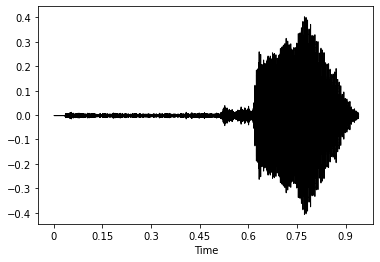

In [4]:
import librosa as librosa
import os
path = "/Users/ksr/Machine Learning/Final Project Audio/audio/4"
y,sr=librosa.load('audio/0/american_f_Alexa_20230406110149.wav',sr=32000)
librosa.display.waveshow(y,sr=sr,color='black')
sr


sri-lankan_f_Thevasha_20230405112448.wav
indian_f_Tejaswini_20230406085222.wav
american_m_Evan_20230406131112.wav
american_m_Josh_20230405130013.wav
american_f_Alexa_20230406110150.wav
nigerian_m_Amara_20230411132946.wav
pakistani_m_Vijay_20230411132703.wav
sri-lankan_f_Prathi_20230406133121.wav
indian_m_AntarikshLodhi_20230410114208.wav
indian_f_Bhavana_20230406090952.wav
ghanaian_m_Wisdom_20230411133750.wav
american_f_Maria_20230405140612.wav
american_m_Selorm_20230408180030.wav
nigerian_m_Ola_20230411135205.wav
ghanaian_m_Emma_20230411134116.wav
indian_m_AntarikshLodhi_20230410114211.wav
ghanaian_m_Wilson_20230411133436.wav
venezuelan_f_Glories_20230406111759.wav
american_f_Alexa_20230406110149.wav
brazilian_m_Maeva_20230406094754.wav
chinese_m_Sam_20230411131718.wav
american_m_Shaun_20230406131836.wav


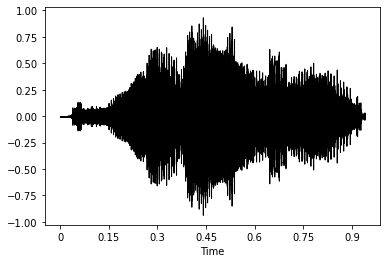

In [2]:
import librosa as librosa
import numpy as np
from matplotlib import pyplot as plt
import os
path = "/Users/ksr/Machine Learning/Final Project Audio/audio/0"
dir_list = os.listdir(path)
for name in dir_list:
    print(name)
    actual='audio/0/'+name
    y, sr = librosa.load(actual)
    spectrogram = librosa.stft(y)
    librosa.display.waveshow(y,sr=sr,color='black')
    



In [ ]:
#Spectrogram vs WaveShow

spectrograms = []
waveforms = []
for file in dir_list:
    actual='audio/0/'+file
    y, sr = librosa.load(actual)
    waveforms.append(y)
    spectrogram = librosa.stft(y)
    spectrograms.append(spectrogram)
for i, (waveform, spectrogram) in enumerate(zip(waveforms, spectrograms)):
    plt.figure(figsize=(10, 8))
    
    # plot waveform
    plt.subplot(211)
    librosa.display.waveshow(waveform, sr=sr)
    plt.title(f'Waveform for {dir_list[i]}')
    
    # plot spectrogram
    plt.subplot(212)
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(spectrogram), ref=np.max),
                                y_axis='linear', x_axis='time') 
    plt.title(f'Spectrogram for {dir_list[i]}')
    plt.colorbar(format='%+2.0f dB')
    
    plt.tight_layout()
    plt.show()

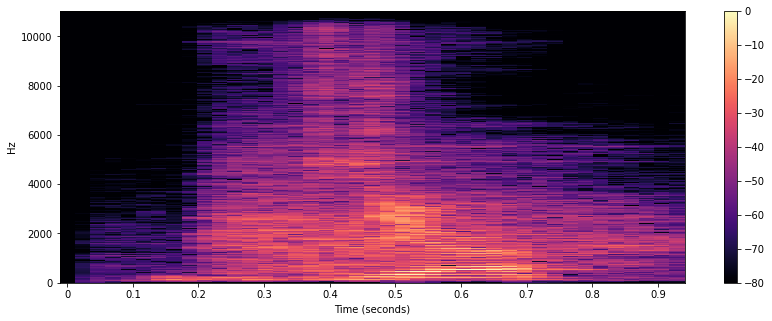

In [4]:
D=librosa.stft(y)
s_db=librosa.amplitude_to_db(np.abs(D), ref=np.max)
plt.figure(figsize=(14,5))
img=librosa.display.specshow(s_db,sr=sr,x_axis='s',y_axis='linear')
plt.colorbar()

In [ ]:
spectrograms = []
waveforms = []
mel_spectrogram=[]
for i,file in enumerate(dir_list):
    actual='audio/0/'+file
    y, sr = librosa.load(actual)
    waveforms.append(y)
    spectrogram = librosa.stft(y)
    spectrograms.append(spectrogram)
    S=librosa.feature.melspectrogram(y=y,sr=sr,n_mels=128,)
    s_db_mel=librosa.amplitude_to_db(S, ref=np.max)
    mel_spectrogram.append(s_db_mel)
    plt.figure(figsize=(14,5))
    img=librosa.display.specshow(s_db_mel,sr=sr,x_axis='s',y_axis='linear')
    plt.title(f'Mel Spectrogram for {dir_list[i]}')
    plt.colorbar()
    print(s_db_mel.shape)

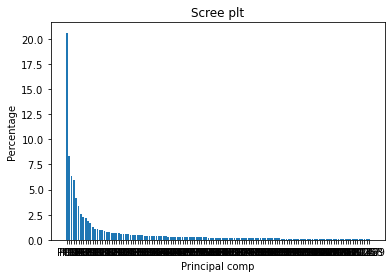

129

In [5]:
import pickle
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
features=[]
target=[]
with open("data/mel_spectrograms.pickle", "rb") as f:
    data = pickle.load(f)
    for j in range(0,len(data)):
        for i in range(0,len(data[j])): 
            features.append(data[j][i].flatten())
            target.append(j)
features_df=pd.DataFrame(features)
features_df.fillna(0,inplace=True)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(features_df)
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit(scaled)
pca_data = pca.transform(scaled)
per_var = np.round(pca.explained_variance_ratio_* 100,decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x = range(1,len(per_var)+1),height=per_var,tick_label = labels)
plt.ylabel('Percentage')
plt.xlabel('Principal comp')
plt.title('Scree plt')
plt.show()
pca.n_components_

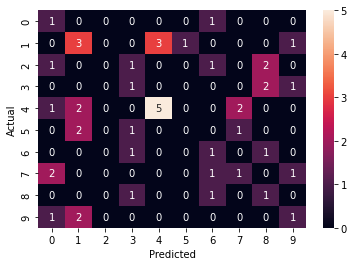

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sb
X_train,X_test,y_train,y_test=train_test_split(scaled,target,test_size=0.2)
from sklearn.svm import SVC 
model=SVC(C=500,kernel='rbf')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
model.score(X_test,y_test)
cm=confusion_matrix(y_test,y_pred)
sb.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [1]:
import pickle
with open("data/mel_spectrograms.pickle", "rb") as f:
    data = pickle.load(f)
print(data[0][3].shape,data[0].keys())

AttributeError: 'list' object has no attribute 'keys'

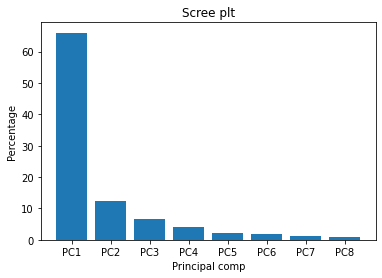

In [18]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit(s_db_mel)
pca_data = pca.transform(s_db_mel)

per_var = np.round(pca.explained_variance_ratio_* 100,decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x = range(1,len(per_var)+1),height=per_var,tick_label = labels)
plt.ylabel('Percentage')
plt.xlabel('Principal comp')
plt.title('Scree plt')
plt.show()

1. web scraping 

In [4]:
print('shiva')

shiva


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np

# Replace this with your confusion matrix tensor
conf_matrix = np.array([[0, 1, 1, 0, 1, 0, 0, 1, 0, 0],
                       [1, 0, 0, 0, 1, 1, 0, 0, 1, 2],
                       [0, 1, 0, 0, 1, 1, 0, 0, 0, 0],
                       [0, 0, 1, 0, 0, 0, 0, 0, 1, 2],
                       [1, 0, 0, 0, 0, 0, 0, 1, 1, 2],
                       [0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                       [0, 1, 0, 1, 1, 1, 1, 0, 0, 0],
                       [0, 1, 0, 0, 1, 1, 0, 1, 0, 0],
                       [0, 1, 0, 0, 1, 0, 1, 1, 1, 0],
                       [1, 2, 1, 0, 0, 0, 0, 1, 0, 0]])

# Create a heatmap using Seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

# Add labels
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")

# Show the plot
plt.show()


: 

In [8]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 2.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 45.6 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.5/502.5 kB 28.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
